##Import Library


In [315]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Warnings
import warnings
warnings.filterwarnings('ignore')


## Import Dataset

In [316]:
!gdown --id 1rjGu8Otkz2Sa0wRX_AWnAJk7QqJs4mmB

'gdown' is not recognized as an internal or external command,
operable program or batch file.


In [317]:
df = pd.read_csv('amazon_reviews.csv')
df

,Unnamed: 0,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
0,0,NaN,4.0,No issues.,2014-07-23,138,0,0,0,0,0.0,0.0
1,1,0mie,5.0,"Purchased this for my device, it worked as advertised. You can never have too much phone memory, since I download a lot of stuff this was a no brainer for me.",2013-10-25,409,0,0,0,0,0.0,0.0
2,2,1K3,4.0,it works as expected. I should have sprung for the higher capacity. I think its made a bit cheesier than the earlier versions; the paint looks not as clean as before,2012-12-23,715,0,0,0,0,0.0,0.0
3,3,1m2,5.0,"This think has worked out great.Had a diff. bran 64gb card and if went south after 3 months.This one has held up pretty well since I had my S3, now on my Note3.*** update 3/21/14I've had this for a few months and have had ZERO issue's since it was transferred from my S3 to my Note3 and into a note2. This card is reliable and solid!Cheers!",2013-11-21,382,0,0,0,0,0.0,0.0
4,4,2&amp;1/2Men,5.0,"Bought it with Retail Packaging, arrived legit, in a orange envelope, english version not asian like the picture shows. arrived quickly, bought a 32 and 16 both retail packaging for my htc one sv and Lg Optimus, both cards in working order, probably best price you'll get for a nice sd card",2013-07-13,513,0,0,0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4910,4910,"ZM ""J""",1.0,"I bought this Sandisk 16GB Class 10 to use with my HTC Inspire, after 3 months, I am getting constant error saying SD Card unmounted unexpectedly.Then today, the dang fkang card won't even read in the card reader, I have 10GB worth of videos and pictures, memories that I will never be able to get back. I am very upset.",2013-07-23,503,0,0,0,0,0.0,0.0
4911,4911,Zo,5.0,Used this for extending the capabilities of my Samsung Galaxy Note 10. It greatly expands it use and was a snap to install and get started with it.,2013-08-22,473,0,0,0,0,0.0,0.0
4912,4912,Z S Liske,5.0,Great card that is very fast and reliable. It comes with an optional adapter for SD slots. Being that this is a Class 10 card it transfers data really fast and for video this is a must! Great for GoPros and other small cameras alike.,2014-03-31,252,0,0,0,0,0.0,0.0
4913,4913,Z Taylor,5.0,"Good amount of space for the stuff I want to do, and fits in my GoPro. What more can I say?",2013-09-16,448,0,0,0,0,0.0,0.0


## Preprocessing

In [318]:
# Select Only Review Text Column
review = df[['reviewText']]
review

,reviewText
0,No issues.
1,"Purchased this for my device, it worked as advertised. You can never have too much phone memory, since I download a lot of stuff this was a no brainer for me."
2,it works as expected. I should have sprung for the higher capacity. I think its made a bit cheesier than the earlier versions; the paint looks not as clean as before
3,"This think has worked out great.Had a diff. bran 64gb card and if went south after 3 months.This one has held up pretty well since I had my S3, now on my Note3.*** update 3/21/14I've had this for a few months and have had ZERO issue's since it was transferred from my S3 to my Note3 and into a note2. This card is reliable and solid!Cheers!"
4,"Bought it with Retail Packaging, arrived legit, in a orange envelope, english version not asian like the picture shows. arrived quickly, bought a 32 and 16 both retail packaging for my htc one sv and Lg Optimus, both cards in working order, probably best price you'll get for a nice sd card"
...,...
4910,"I bought this Sandisk 16GB Class 10 to use with my HTC Inspire, after 3 months, I am getting constant error saying SD Card unmounted unexpectedly.Then today, the dang fkang card won't even read in the card reader, I have 10GB worth of videos and pictures, memories that I will never be able to get back. I am very upset."
4911,Used this for extending the capabilities of my Samsung Galaxy Note 10. It greatly expands it use and was a snap to install and get started with it.
4912,Great card that is very fast and reliable. It comes with an optional adapter for SD slots. Being that this is a Class 10 card it transfers data really fast and for video this is a must! Great for GoPros and other small cameras alike.
4913,"Good amount of space for the stuff I want to do, and fits in my GoPro. What more can I say?"


### Cleaning Data

In [319]:
import re
import string
import pandas as pd
def cleaningText(text):
  if isinstance(text, str):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) # remove mentions
    text = re.sub(r'#[A-Za-z0-9]+', '', text) # remove hashtag
    text = re.sub(r'RT[\s]', '', text) # remove RT
    text = re.sub(r"http\S+", '', text) # remove link
    text = re.sub(r'[0-9]+', '', text) # remove numbers
    text = re.sub(r'[^\w\s]', '', text) # remove numbers
    text = text.replace('\n', ' ') # replace new line into space
    text = text.translate(str.maketrans('', '', string.punctuation)) # remove all punctuations
    text = text.strip(' ') # remove characters space from both left and right text
  return text

review['review_clean'] = review['reviewText'].apply(cleaningText)
review

,reviewText,review_clean
0,No issues.,No issues
1,"Purchased this for my device, it worked as advertised. You can never have too much phone memory, since I download a lot of stuff this was a no brainer for me.",Purchased this for my device it worked as advertised You can never have too much phone memory since I download a lot of stuff this was a no brainer for me
2,it works as expected. I should have sprung for the higher capacity. I think its made a bit cheesier than the earlier versions; the paint looks not as clean as before,it works as expected I should have sprung for the higher capacity I think its made a bit cheesier than the earlier versions the paint looks not as clean as before
3,"This think has worked out great.Had a diff. bran 64gb card and if went south after 3 months.This one has held up pretty well since I had my S3, now on my Note3.*** update 3/21/14I've had this for a few months and have had ZERO issue's since it was transferred from my S3 to my Note3 and into a note2. This card is reliable and solid!Cheers!",This think has worked out greatHad a diff bran gb card and if went south after monthsThis one has held up pretty well since I had my S now on my Note update Ive had this for a few months and have had ZERO issues since it was transferred from my S to my Note and into a note This card is reliable and solidCheers
4,"Bought it with Retail Packaging, arrived legit, in a orange envelope, english version not asian like the picture shows. arrived quickly, bought a 32 and 16 both retail packaging for my htc one sv and Lg Optimus, both cards in working order, probably best price you'll get for a nice sd card",Bought it with Retail Packaging arrived legit in a orange envelope english version not asian like the picture shows arrived quickly bought a and both retail packaging for my htc one sv and Lg Optimus both cards in working order probably best price youll get for a nice sd card
...,...,...
4910,"I bought this Sandisk 16GB Class 10 to use with my HTC Inspire, after 3 months, I am getting constant error saying SD Card unmounted unexpectedly.Then today, the dang fkang card won't even read in the card reader, I have 10GB worth of videos and pictures, memories that I will never be able to get back. I am very upset.",I bought this Sandisk GB Class to use with my HTC Inspire after months I am getting constant error saying SD Card unmounted unexpectedlyThen today the dang fkang card wont even read in the card reader I have GB worth of videos and pictures memories that I will never be able to get back I am very upset
4911,Used this for extending the capabilities of my Samsung Galaxy Note 10. It greatly expands it use and was a snap to install and get started with it.,Used this for extending the capabilities of my Samsung Galaxy Note It greatly expands it use and was a snap to install and get started with it
4912,Great card that is very fast and reliable. It comes with an optional adapter for SD slots. Being that this is a Class 10 card it transfers data really fast and for video this is a must! Great for GoPros and other small cameras alike.,Great card that is very fast and reliable It comes with an optional adapter for SD slots Being that this is a Class card it transfers data really fast and for video this is a must Great for GoPros and other small cameras alike
4913,"Good amount of space for the stuff I want to do, and fits in my GoPro. What more can I say?",Good amount of space for the stuff I want to do and fits in my GoPro What more can I say


### Case Folding

In [320]:
def casefoldingText(text): # Converting all the characters in a text into lower case
    text = text.lower()
    return text

review['review_clean'].fillna('', inplace=True)  # Mengganti NaN dengan string kosong
review['review_clean'] = review['review_clean'].astype(str)  # Memastikan bahwa semua nilai adalah string
review['casefolding'] = review['review_clean'].apply(casefoldingText)

### Tokenize

In [321]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')

def tokenizingText(text): # Tokenizing or splitting a string, text into a list of tokens
    text = word_tokenize(text)
    return text

review['tokens'] = review['casefolding'].apply(tokenizingText)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\psukr\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### Remove Stopword

In [322]:
from nltk.corpus import stopwords
nltk.download("stopwords")
def filteringText(text): # Remove stopwors in a text
    listStopwords = set(stopwords.words('english'))
    listStopwords.update(listStopwords)
    filtered = []
    for txt in text:
        if txt not in listStopwords:
            filtered.append(txt)
    text = filtered
    return text
review['stopword'] = review['tokens'].apply(filteringText)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\psukr\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [323]:
# from nltk.stem import SnowballStemmer
# stemmer = SnowballStemmer("english")

# # Create Stemmer Function
# def word_stemmer(text):
#     stem_text = [stemmer.stem(i) for i in text]
#     return stem_text

# # Apply to the dataframe
# review['review_stemming'] = review['review_stopword'].apply(lambda x: word_stemmer(x))
# review

### Merge to sentence

In [324]:
def toSentence(list_words): # Convert list of words into sentence
    sentence = ' '.join(word for word in list_words)
    return sentence

review['review_akhir'] = review['stopword'].apply(toSentence)
review

,reviewText,review_clean,casefolding,tokens,stopword,review_akhir
0,No issues.,No issues,no issues,"[no, issues]",[issues],issues
1,"Purchased this for my device, it worked as advertised. You can never have too much phone memory, since I download a lot of stuff this was a no brainer for me.",Purchased this for my device it worked as advertised You can never have too much phone memory since I download a lot of stuff this was a no brainer for me,purchased this for my device it worked as advertised you can never have too much phone memory since i download a lot of stuff this was a no brainer for me,"[purchased, this, for, my, device, it, worked, as, advertised, you, can, never, have, too, much, phone, memory, since, i, download, a, lot, of, stuff, this, was, a, no, brainer, for, me]","[purchased, device, worked, advertised, never, much, phone, memory, since, download, lot, stuff, brainer]",purchased device worked advertised never much phone memory since download lot stuff brainer
2,it works as expected. I should have sprung for the higher capacity. I think its made a bit cheesier than the earlier versions; the paint looks not as clean as before,it works as expected I should have sprung for the higher capacity I think its made a bit cheesier than the earlier versions the paint looks not as clean as before,it works as expected i should have sprung for the higher capacity i think its made a bit cheesier than the earlier versions the paint looks not as clean as before,"[it, works, as, expected, i, should, have, sprung, for, the, higher, capacity, i, think, its, made, a, bit, cheesier, than, the, earlier, versions, the, paint, looks, not, as, clean, as, before]","[works, expected, sprung, higher, capacity, think, made, bit, cheesier, earlier, versions, paint, looks, clean]",works expected sprung higher capacity think made bit cheesier earlier versions paint looks clean
3,"This think has worked out great.Had a diff. bran 64gb card and if went south after 3 months.This one has held up pretty well since I had my S3, now on my Note3.*** update 3/21/14I've had this for a few months and have had ZERO issue's since it was transferred from my S3 to my Note3 and into a note2. This card is reliable and solid!Cheers!",This think has worked out greatHad a diff bran gb card and if went south after monthsThis one has held up pretty well since I had my S now on my Note update Ive had this for a few months and have had ZERO issues since it was transferred from my S to my Note and into a note This card is reliable and solidCheers,this think has worked out greathad a diff bran gb card and if went south after monthsthis one has held up pretty well since i had my s now on my note update ive had this for a few months and have had zero issues since it was transferred from my s to my note and into a note this card is reliable and solidcheers,"[this, think, has, worked, out, greathad, a, diff, bran, gb, card, and, if, went, south, after, monthsthis, one, has, held, up, pretty, well, since, i, had, my, s, now, on, my, note, update, ive, had, this, for, a, few, months, and, have, had, zero, issues, since, it, was, transferred, from, my, s, to, my, note, and, into, a, note, this, card, is, reliable, and, solidcheers]","[think, worked, greathad, diff, bran, gb, card, went, south, monthsthis, one, held, pretty, well, since, note, update, ive, months, zero, issues, since, transferred, note, note, card, reliable, solidcheers]",think worked greathad diff bran gb card went south monthsthis one held pretty well since note update ive months zero issues since transferred note note card reliable solidcheers
4,"Bought it with Retail Packaging, arrived legit, in a orange envelope, english version not asian like the picture shows. arrived quickly, bought a 32 and 16 both retail packaging for my htc one sv and Lg Optimus, both cards in working order, probably best price you'll get for a nice sd card",Bought it with Retail Packaging arrived legit in a orange envelope english 

In [325]:
# Check for missing values
print('Missing values:\n', review.isnull().sum())

Missing values:
 reviewText      1
review_clean    0
casefolding     0
tokens          0
stopword        0
review_akhir    0
dtype: int64


In [326]:
# Loads lexicon positive and negative data
lexicon_positive = dict()
import csv
with open('positive.csv', 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        lexicon_positive[row[0]] = int(row[1])

lexicon_negative = dict()
import csv
with open('negative.csv', 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        lexicon_negative[row[0]] = int(row[1])

# Function to determine sentiment polarity of review
def sentiment_analysis_lexicon(text):
    #for word in text:
    score = 0
    for word in text:
        if (word in lexicon_positive):
            score = score + lexicon_positive[word]
    for word in text:
        if (word in lexicon_negative):
            score = score + lexicon_negative[word]
    polarity=''
    if (score >= 0):
        polarity = 'positive'
    elif (score < 0):
        polarity = 'negative'
    # else:
    #     polarity = 'neutral'
    return score, polarity

In [327]:
results = review['stopword'].apply(sentiment_analysis_lexicon)
results = list(zip(*results))
review['polarity_score'] = results[0]
review['polarity'] = results[1]
print(review['polarity'].value_counts())

# Export to csv file

polarity
positive    4438
negative     477
Name: count, dtype: int64


In [328]:
review

,reviewText,review_clean,casefolding,tokens,stopword,review_akhir,polarity_score,polarity
0,No issues.,No issues,no issues,"[no, issues]",[issues],issues,0,positive
1,"Purchased this for my device, it worked as advertised. You can never have too much phone memory, since I download a lot of stuff this was a no brainer for me.",Purchased this for my device it worked as advertised You can never have too much phone memory since I download a lot of stuff this was a no brainer for me,purchased this for my device it worked as advertised you can never have too much phone memory since i download a lot of stuff this was a no brainer for me,"[purchased, this, for, my, device, it, worked, as, advertised, you, can, never, have, too, much, phone, memory, since, i, download, a, lot, of, stuff, this, was, a, no, brainer, for, me]","[purchased, device, worked, advertised, never, much, phone, memory, since, download, lot, stuff, brainer]",purchased device worked advertised never much phone memory since download lot stuff brainer,0,positive
2,it works as expected. I should have sprung for the higher capacity. I think its made a bit cheesier than the earlier versions; the paint looks not as clean as before,it works as expected I should have sprung for the higher capacity I think its made a bit cheesier than the earlier versions the paint looks not as clean as before,it works as expected i should have sprung for the higher capacity i think its made a bit cheesier than the earlier versions the paint looks not as clean as before,"[it, works, as, expected, i, should, have, sprung, for, the, higher, capacity, i, think, its, made, a, bit, cheesier, than, the, earlier, versions, the, paint, looks, not, as, clean, as, before]","[works, expected, sprung, higher, capacity, think, made, bit, cheesier, earlier, versions, paint, looks, clean]",works expected sprung higher capacity think made bit cheesier earlier versions paint looks clean,2,positive
3,"This think has worked out great.Had a diff. bran 64gb card and if went south after 3 months.This one has held up pretty well since I had my S3, now on my Note3.*** update 3/21/14I've had this for a few months and have had ZERO issue's since it was transferred from my S3 to my Note3 and into a note2. This card is reliable and solid!Cheers!",This think has worked out greatHad a diff bran gb card and if went south after monthsThis one has held up pretty well since I had my S now on my Note update Ive had this for a few months and have had ZERO issues since it was transferred from my S to my Note and into a note This card is reliable and solidCheers,this think has worked out greathad a diff bran gb card and if went south after monthsthis one has held up pretty well since i had my s now on my note update ive had this for a few months and have had zero issues since it was transferred from my s to my note and into a note this card is reliable and solidcheers,"[this, think, has, worked, out, greathad, a, diff, bran, gb, card, and, if, went, south, after, monthsthis, one, has, held, up, pretty, well, since, i, had, my, s, now, on, my, note, update, ive, had, this, for, a, few, months, and, have, had, zero, issues, since, it, was, transferred, from, my, s, to, my, note, and, into, a, note, this, card, is, reliable, and, solidcheers]","[think, worked, greathad, diff, bran, gb, card, went, south, monthsthis, one, held, pretty, well, since, note, update, ive, months, zero, issues, since, transferred, note, note, card, reliable, solidcheers]",think worked greathad diff bran gb card went south monthsthis one held pretty well since note update ive months zero issues since transferred note note card reliable solidcheers,0,positive
4,"Bought it with Retail Packaging, arrived legit, in a orange envelope, english version not asian like the picture shows. arrived quickly, bought a 32 and 16 both retail packaging for my htc one sv and Lg Optimus, both cards in working order, probably best price you'll get for a nice sd card",Bought 

In [329]:
review.to_csv('review.csv', index=False)

## Visualize


In [330]:
!pip install wordcloud
from wordcloud import WordCloud
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer


[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


### Annual Review Contributions

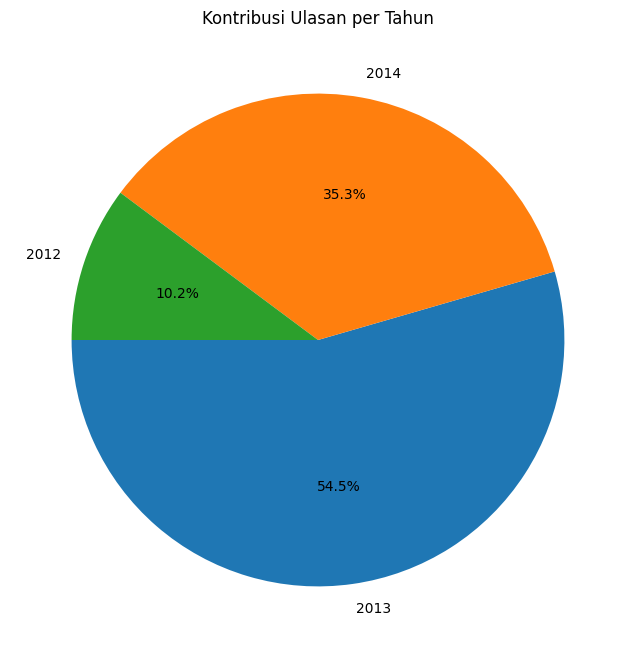

In [331]:
df['reviewTime'] = pd.to_datetime(df['reviewTime'])

# Hitung jumlah ulasan per tahun
review_counts = df['reviewTime'].dt.year.value_counts()
labels = review_counts.index

# Buat pie chart
plt.figure(figsize=(8, 8))
plt.pie(review_counts, labels=review_counts.index, autopct='%1.1f%%', startangle=180)
plt.title('Kontribusi Ulasan per Tahun')

plt.show()

### Number of Reviews by Rating

In [332]:
#  Shape of the dataset, and breakdown of the classes
df = df.rename(columns={'overall': 'rating'})
print(f"Input data has { len(df) } rows and { len(df.columns) } columns")
print(f"rating 1.0 = { len(df[df['rating']==1.0]) } rows")
print(f"rating 2.0 = { len(df[df['rating']==2.0]) } rows")
print(f"rating 3.0 = { len(df[df['rating']==3.0]) } rows")
print(f"rating 4.0 = { len(df[df['rating']==4.0]) } rows")
print(f"rating 5.0 = { len(df[df['rating']==5.0]) } rows")

Input data has 4915 rows and 12 columns
rating 1.0 = 244 rows
rating 2.0 = 80 rows
rating 3.0 = 142 rows
rating 4.0 = 527 rows
rating 5.0 = 3922 rows


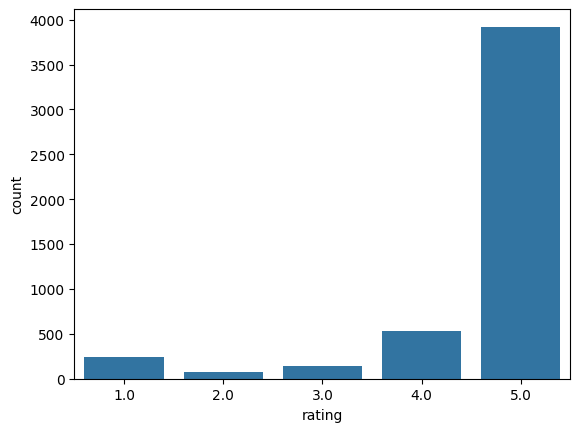

In [333]:
# Missing values in the dataset
# print(f"Number of null in label: { df['Rating'].isnull().sum() }")
# print(f"Number of null in text: { df['Review'].isnull().sum() }")
sns.countplot(x='rating', data=df);

### Text Length Distribution

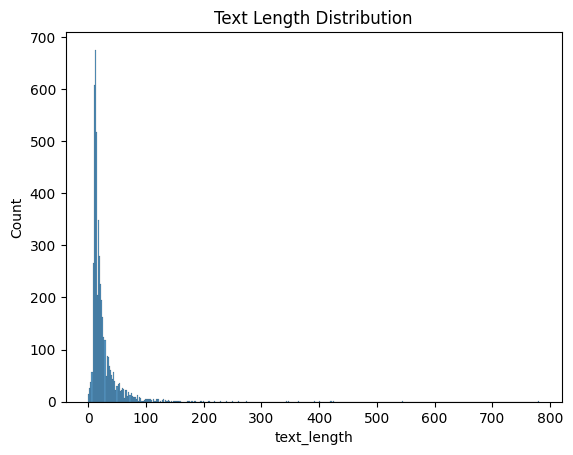

In [334]:
# Visualize text length distribution
review['text_length'] = review['review_akhir'].apply(lambda x: len(x.split()))
sns.histplot(review['text_length'])
plt.title('Text Length Distribution')
plt.show()

### Most Frequent Words

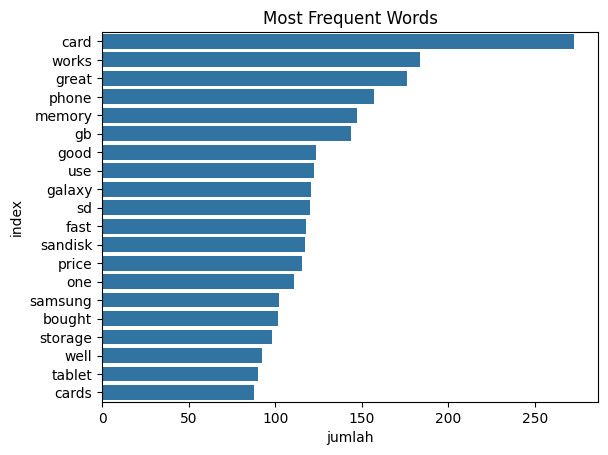

In [335]:
# Visualize most frequent words
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(review['review_akhir'])
tfidf_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
tfidf_df = tfidf_df.sum().reset_index(name='jumlah')
tfidf_df = tfidf_df.sort_values('jumlah', ascending=False).head(20)
sns.barplot(x='jumlah', y='index', data=tfidf_df)
plt.title('Most Frequent Words')
plt.show()

### Distribution Class Polarity Review

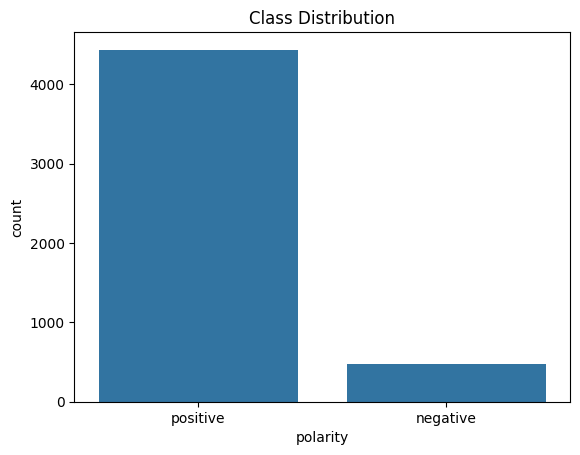

polarity
positive    4438
negative     477
Name: count, dtype: int64


In [336]:
sns.countplot(x='polarity', data=review)
plt.title('Class Distribution')
plt.show()

polarity_counts = review['polarity'].value_counts()
print(polarity_counts)

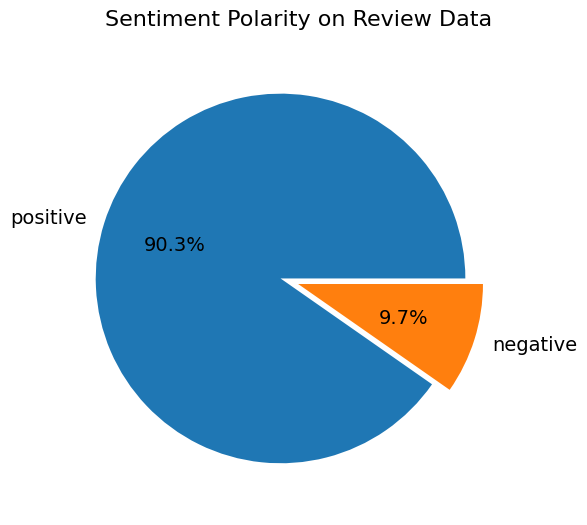

In [337]:
fig, ax = plt.subplots(figsize = (6, 6))
sizes = [count for count in review['polarity'].value_counts()]
labels = list(review['polarity'].value_counts().index)
explode = (0.1, 0)
ax.pie(x = sizes, labels = labels, autopct = '%1.1f%%', explode = explode, textprops={'fontsize': 14})
ax.set_title('Sentiment Polarity on Review Data', fontsize = 16, pad = 20)
plt.show()

### Word Cloud : Negative Review

In [338]:
reviews_negatif = review[review['polarity'] == 'negative']['casefolding']
reviews_negatif

19                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  this works with the nl  no video stuttering like with the gb  blah blah blah blah to fill in the rest
24                                                                                                                                                                                            

In [339]:
reviews_negatif = review[review['polarity'] == 'negative']
print(reviews_negatif.columns)
print(reviews_negatif.head())


Index(['reviewText', 'review_clean', 'casefolding', 'tokens', 'stopword',
       'review_akhir', 'polarity_score', 'polarity', 'text_length'],
      dtype='object')
                                                                                                                                                                                                                                                                                                                                       reviewText  \
19                                                                                                                                                                                                                                 This works with the NL1520.  No video stuttering like with the 64gb.  Blah blah blah blah to fill in the rest.   
24                                                                                                                                                       

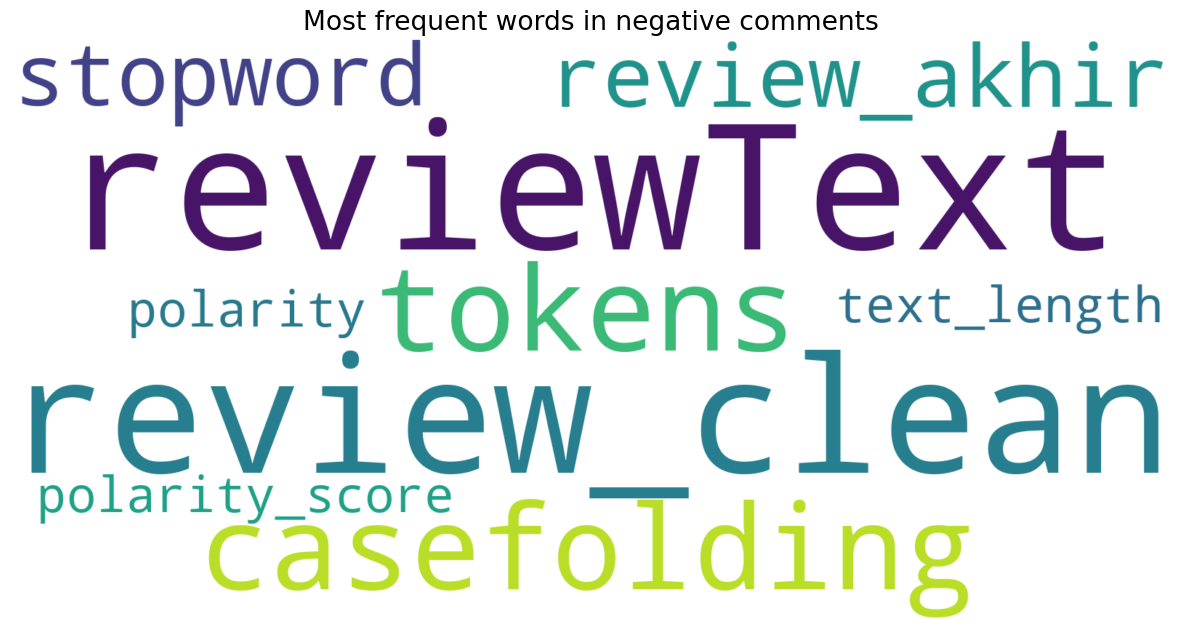

In [340]:
text = ' '.join([word for word in reviews_negatif])
plt.figure(figsize = (15,15), facecolor='None')
wordcloud = WordCloud(max_words=300, width=1600, height=800,background_color = 'white').generate(text)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent words in negative comments', fontsize=19)
plt.show()

### Word Cloud : Positive Review

In [341]:
reviews_positif = review[review['polarity'] == 'positive']['casefolding']
reviews_positif

0                                                                                                                                                                                                                                                                                                                      no issues
1                                                                                                                                                                     purchased this for my device it worked as advertised you can never have too much phone memory since i download a lot of stuff this was a no brainer for me
2                                                                                                                                                            it works as expected i should have sprung for the higher capacity  i think its made a bit cheesier than the earlier versions the paint looks not as clean as before
3       this think has worked out gre

In [342]:
reviews_positif = review[review['polarity'] == 'positive']
print(reviews_positif.columns)
print(reviews_positif.head())


Index(['reviewText', 'review_clean', 'casefolding', 'tokens', 'stopword',
       'review_akhir', 'polarity_score', 'polarity', 'text_length'],
      dtype='object')
                                                                                                                                                                                                                                                                                                                                             reviewText  \
0                                                                                                                                                                                                                                                                                                                                            No issues.   
1                                                                                                                                            

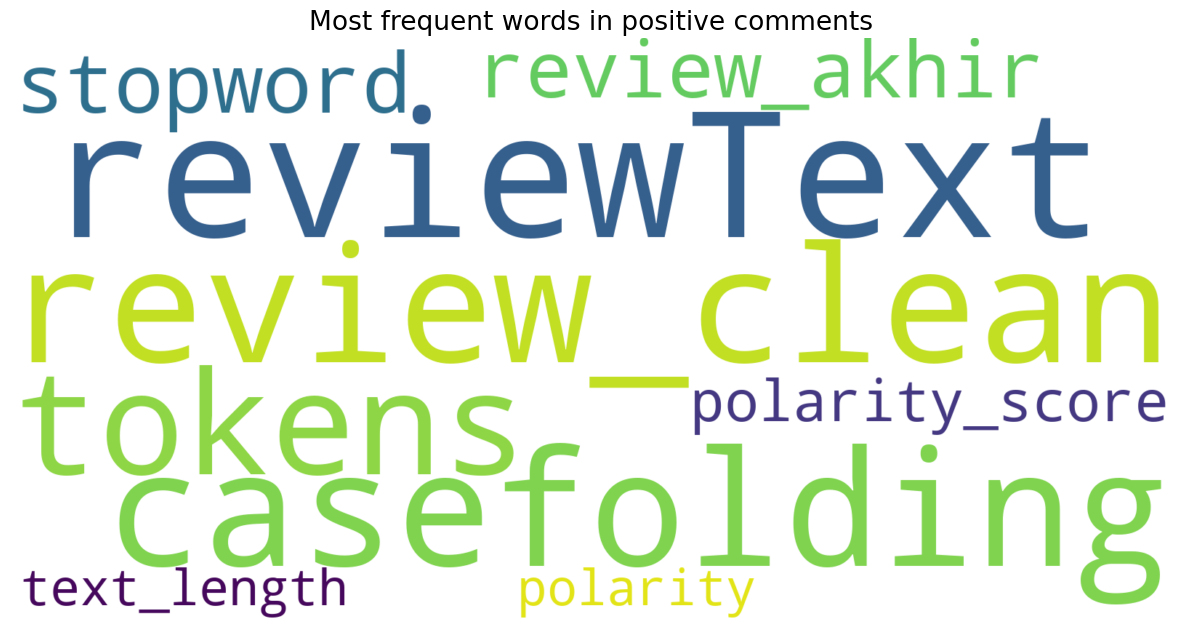

In [343]:
text = ' '.join([word for word in reviews_positif])
plt.figure(figsize = (15,15), facecolor='None')
wordcloud = WordCloud(max_words=300, width=1600, height=800,background_color = 'white').generate(text)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent words in positive comments', fontsize=19)
plt.show()


In [344]:
pd.set_option('display.max_colwidth', 3000)
reviews_positif = reviews_positif[['review_akhir', 'polarity_score', 'polarity']].sort_values(by = 'polarity_score', ascending=False).reset_index(drop = True)
reviews_positif.index += 1
reviews_positif[0:10]



,review_akhir,polarity_score,polarity
1,note please read last update scroll bottom im leaving review star appears help others purchased similar experiencei give sandisk stars customer service star product manufactured past newly manufactured products contain software rom fix id give product starsto purchased card due great reviews used galaxy gs smartphone storage solution problem one solve without returning card sandisk replacement warranty believe tried everything google searches returned solutions formatting exfat formatting gs copying data card phone etc nothing worked please stop pulling hair hopefully get result hope get soon rmad send back tomorrow free replacement warrantythe problem confirmed sandisk customer support rep asked specifically asked used gs card unmount inadvertently may true cards manufactured rom patch described implemented manufacturing cause data become corrupt luckily experience frustrating us saving mp camera pictures card mp movies stop middle movie unmounts view picture gallery worse right take picture issue experienced sandisk knows issue sandisk knows issue replace card call info take care warranty good name reason want keep sorry sandisk star thought way get message searching solution customer rep told sandisk tried work samsung resolve issue samsung refused acknowledge problem exists card phones especially flagship gs phones customer rep told knowledge card works fine regular cameras samsung gs phones cameras obviously even worked fine phones htc etc could accommodate gb cards hence star ratings others solution sandisk came write patch rom card specifically address issue samsung gs phones maybe samsung phones like gs assured new card would get would work flawlessly see weeks purchased card amazon june ones currently manufactured one get new patch however sandisk manufactures batches like industry old batches unpatched cards obviously exist warehouses asked software patch could download told possible hence hard coded patch cards romso take care problemafter speaking sandisk us customer support link info learned didgo sandisk site call consumer products support us sandisk tell card unmounting gs assume also problem experienced gs owners confirm information approve return min approval window mine basically instantaneously send emails ups return label instructions btw also asked magnifying glass id serial card didnt couldnt read numbers super small printed plastic dont believe take look told rep couldnt read said problem would process without serial assume send new replacement card receive card send makes sensewell thats problem hopefully solved lets see weeks rep super nice seemed like familiar problem kudos sandisk taking care however would nice type communication notice issue besides google info sources forums etc spent hours maybe couple days total hours worth thinking issue phone data transfer oh well thats goesi really hope review helps problem good luckbtw id give card stars problem solved patched rom newer cards data transfer speeds awesome car...,59,positive
2,update lovely wife bought samsung galaxy tab fathers day ive loving ever since samsung products galaxy tab ability add microsd card expand memory device since year decided research see sandisk offered anything new product lineup microsd cards worst best performancewise followssandisksandisk ultrasandisk ultra plussandisk extremesandisk extreme plussandisk extreme pronow difference cards simply speed readwrite data card yes published rating cards except sandisk regular class uhsi thats rating actual real world performance get better model faster cards come expensive prices since amazon doesnt carry ultra plus model microsd card direct comparisons sandisk ultra extreme extreme plus mentioned earlier review purchased sandisk ultra galaxy question want pay card faster one already owned could pay almost double get sandisks ndmost fastest microsd cardthe ultra works perfectly fine style usage storingcapturing pictures hd video movie playb

In [345]:
pd.set_option('display.max_colwidth', 3000)
reviews_negatif = reviews_negatif[['review_akhir', 'polarity_score', 'polarity']].sort_values(by = 'polarity_score', ascending=True)[0:10].reset_index(drop = True)
reviews_negatif.index += 1
reviews_negatif[0:20]

,review_akhir,polarity_score,polarity
1,bought wifes android phone failed months figured luck draw mine failed months losing bunch photos videos made sure back every weeks even lost bunch photos month newbornclearly sandisk bad batch lot return policy horrible wont buying sandisk matter cheap bought sale around january half price similar sd cards sandisk clearly knew bad batch shame dumping customer matter cheapwhile would presumed would solved problem production buy risk sandisk sell product ridiculous failure rateedit submitting review research sites low star reviews sandisk clearly guilty selling defective product batch months ago said put super discount sale knew thumbing nose customers fell outside warrantee like myselfto knowingly sell customer something going fail unacceptable rate ignore failed little bit outside warrantee bad faith beg people considering buying product thumb reviews warning failures companies lose sales reconsider screwing customers like thispersonally bought several sandisk thumb drives compactflash cards sandisk mp player thumb drives ok wouldnt buy another mp player buggy hell overall neutral favorable opinion anymoreif think overreacting please skim pages submitted springtime least one months failed reviews per page,-31,negative
2,bought card originally galaxy note ii intentions using primary downloader could get format correctly phone even using third party format softwarei tried galaxy tab plussame problemsi finally ridiculously put card nikon camera could take whopping k photos highlarge settings would ever need take many photos one session last option use cardit worked well taking photos holiday thankfully fail could get photos onto computer since inserted back camera reformatted like always bam one photo good failure every single time gb card capable taking storing one photo time must run fix file system computerdont waste money card priced really faster cards zero longevity may one think problem created proprietary format exfat makes card loser point poor customer buys itupdate july contacting sandisk offered rma first must verify tried recover wipe data card must ship expense taiwan since emailed reply requested information date purchase photos card packaging ect told data data could accessed card would wiped give information stored card makes less happy guessing want discourage returns would want send data company knowing access information contained would wiped card unreadable unable format unable anything send hoping information destroyed along bad cardsandisk asking whole lot customers since card gone bad several cards go bad well seems whole lot cards shipped die short time periods used love products older flash drives great still using micro cruzer years old going strong one single microsd card company last three months since moved philippines either send junk philippines dropped qc business model create higher profit marginsupdate emailing sandisk expressing displeasure return item intact assess card look atrecover ever personal information may stored card rescinded assume want get card back verify bad make sure trying get free card understand instead requiring send card back asked cut card send photo destroyed card could process new card sent directly philippines hammered pretty hard review email sent regarding bad card sometimes get results case give stars right thing problem cutting card since would operate devices anyway problem returning device intact knowing information stored card banking amazon account info passwords ect would kept card destroyed never bought another sandisk faith restoring gesture remove list companies avoid hope get better qc returned another defective card retailer yesterday find must original packaging replacement lucky still one packages since bought several cards sure gave matching package card returnedi would suggest like several devices dslrs galaxy tab galaxy note sii lgp find way mark cardpackage keep package case card go bad half sandisk gb cards f

## Ekstraksi fitur

In [346]:
# Pisahkan data menjadi fitur (tweet) dan label (sentimen)
X = review['review_akhir']
y = review['polarity']

In [347]:
print(X.shape)
print(y.shape)

(4915,)
(4915,)


In [348]:
# Ekstraksi fitur dengan TF-IDF
tfidf = TfidfVectorizer(max_features=200, min_df=17, max_df=0.8 )
X_tfidf = tfidf.fit_transform(X)

In [349]:
# Konversi hasil ekstraksi fitur menjadi dataframe
features_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf.get_feature_names_out())

# Menampilkan hasil ekstraksi fitur
features_df

,able,adapter,also,always,amazon,android,another,anyone,anything,apps,...,windows,without,work,worked,working,works,worth,would,write,yet
0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
1,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.324172,0.000000,0.000000,0.000000,0.0,0.0,0.0
2,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.281864,0.000000,0.0,0.0,0.0
3,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.191947,0.000000,0.000000,0.000000,0.0,0.0,0.0
4,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.237381,0.000000,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4910,0.247134,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.276128,0.0,0.0,0.0
4911,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
4912,0.000000,0.232725,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
4913,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0


In [350]:
# Bagi data menjadi data latih dan data uji
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=1)

In [351]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3932, 200)
(983, 200)
(3932,)
(983,)


## Modelling

### Logistic Regression

In [352]:
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score, GridSearchCV, cross_validate, train_test_split
from sklearn.ensemble import RandomForestClassifier

In [353]:
# Latih model klasifikasi Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=3, solver='liblinear', max_iter=150)
lr.fit(X_train, y_train)

LogisticRegression(C=3, max_iter=150, solver='liblinear')

In [354]:
from sklearn.metrics import accuracy_score, classification_report

lr_pred = lr.predict(X_test)
lr_acc = accuracy_score(lr_pred,y_test)
print('Test accuracy : {:.2f}%'.format(lr_acc*100))

Test accuracy : 91.66%


In [355]:
print(classification_report(y_test, lr_pred))

              precision    recall  f1-score   support

    negative       0.83      0.16      0.27        94
    positive       0.92      1.00      0.96       889

    accuracy                           0.92       983
   macro avg       0.88      0.58      0.61       983
weighted avg       0.91      0.92      0.89       983



### Tuning Logistic Regression

In [356]:
from sklearn.model_selection import GridSearchCV

# Inisialisasi model Logistic Regression
model = LogisticRegression()

# Daftar parameter yang akan diuji
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 3, 10],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter': [100, 250]
}

# Inisialisasi GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')

# Melatih model dengan kombinasi parameter
grid_search.fit(X_train, y_train)

# Menampilkan parameter terbaik
print("Best Parameters:", grid_search.best_params_)


Best Parameters: {'C': 3, 'max_iter': 100, 'solver': 'saga'}


In [357]:
best_params = grid_search.best_params_
best_lr = LogisticRegression(**best_params)
best_lr.fit(X_train, y_train)
best_lr_pred = best_lr.predict(X_test)
best_lr_acc = accuracy_score(best_lr_pred,y_test)
print('Test accuracy : {:.2f}%'.format(best_lr_acc*100))

Test accuracy : 91.66%


In [358]:
print(classification_report(y_test, lr_pred))

              precision    recall  f1-score   support

    negative       0.83      0.16      0.27        94
    positive       0.92      1.00      0.96       889

    accuracy                           0.92       983
   macro avg       0.88      0.58      0.61       983
weighted avg       0.91      0.92      0.89       983



In [359]:
x_test_ = tfidf.inverse_transform(X_test)

In [360]:
df_lr = pd.DataFrame({
    'Data Test': x_test_,
    'True Label': y_test,
    'Hasil Prediksi': best_lr_pred
})

df_lr

,Data Test,True Label,Hasil Prediksi
2804,"[sd, great, class, far, micro, problems]",positive,positive
1272,"[phone, galaxy, easy, using, samsung, find, issue]",positive,positive
4629,"[good, mbs, write, read, speeds, thing]",positive,positive
3501,"[much, fast, small, say, microsdhc, really, buying]",positive,positive
957,"[phone, gb, months, good, data, microsd, formatted, problems, deal]",positive,positive
...,...,...,...
1546,"[gb, card, cards, best, price, get, sd, great, class, got, micro, im, time, thing, even, find, found]",positive,positive
3285,"[one, price, sd, else, want, adapter, use, put, need, pc]",positive,positive
4220,"[issues, worked, never, phone, since, works, gb, card, one, pretty, well, ive, months, bought, cards, working, sd, sandisk, would, great, files, extra, good, galaxy, still, adapter, used, havent, problem, got, samsung, another, also, im, always, formatted, going, sure, first, bad, seems, see, issue, quick, gopro]",negative,positive
4826,"[purchased, worked, memory, packaging, quickly, sd, tablet, great, came, got, easy, micro, put, windows]",positive,positive


In [361]:
# Menghitung TP, TN, FP, FN
TP_lr = ((df_lr['True Label'] == 'positive') & (df_lr['Hasil Prediksi'] == 'positive')).sum()
TN_lr = ((df_lr['True Label'] == 'negative') & (df_lr['Hasil Prediksi'] == 'negative')).sum()
FP_lr = ((df_lr['True Label'] == 'positive') & (df_lr['Hasil Prediksi'] == 'negative')).sum()
FN_lr = ((df_lr['True Label'] == 'negative') & (df_lr['Hasil Prediksi'] == 'positive')).sum()
print('true positive =', TP_lr)
print('true negative =', TN_lr)
print('False positive =', FP_lr)
print('False negative =', FN_lr)

true positive = 886
true negative = 15
False positive = 3
False negative = 79


In [362]:
# Menghitung jumlah positif dan negatif
asli_positif_lr = ((df_lr['True Label'] == 'positive')).sum()
asli_negatif_lr = ((df_lr['True Label'] == 'negative')).sum()
pred_positif_lr = ((df_lr['Hasil Prediksi'] == 'positive')).sum()
pred_negatif_lr = ((df_lr['Hasil Prediksi'] == 'negative')).sum()
print('asli_positif =', asli_positif_lr)
print('asli_negatif =', asli_negatif_lr)
print('pred_positif =', pred_positif_lr)
print('pred_negatif =', pred_negatif_lr)

asli_positif = 889
asli_negatif = 94
pred_positif = 965
pred_negatif = 18


### Tuning Random Forest

In [363]:
from sklearn.ensemble import RandomForestClassifier

# Assuming you have X_train, X_test, y_train, y_test
# If not, you should split your data into training and testing sets first
# For example: X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2]
}

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier()

# Create GridSearchCV
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the model to the data
grid_search.fit(X_train, y_train)

# Print the best parameters
print("Best parameters:", grid_search.best_params_)


Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}


In [364]:
best_params_rf = grid_search.best_params_
best_rf = RandomForestClassifier(**best_params_rf)
best_rf.fit(X_train, y_train)
best_rf_pred = best_rf.predict(X_test)
best_rf_acc = accuracy_score(best_rf_pred,y_test)
print('Test accuracy : {:.2f}%'.format(best_rf_acc*100))

Test accuracy : 91.15%


In [365]:
print(classification_report(y_test, best_rf_pred))

              precision    recall  f1-score   support

    negative       0.82      0.10      0.17        94
    positive       0.91      1.00      0.95       889

    accuracy                           0.91       983
   macro avg       0.87      0.55      0.56       983
weighted avg       0.90      0.91      0.88       983



In [366]:
x_test_ = tfidf.inverse_transform(X_test)

In [367]:
df_rf = pd.DataFrame({
    'Data Test': x_test_,
    'True Label': y_test,
    'Hasil Prediksi': best_rf_pred
})

df_rf

,Data Test,True Label,Hasil Prediksi
2804,"[sd, great, class, far, micro, problems]",positive,positive
1272,"[phone, galaxy, easy, using, samsung, find, issue]",positive,positive
4629,"[good, mbs, write, read, speeds, thing]",positive,positive
3501,"[much, fast, small, say, microsdhc, really, buying]",positive,positive
957,"[phone, gb, months, good, data, microsd, formatted, problems, deal]",positive,positive
...,...,...,...
1546,"[gb, card, cards, best, price, get, sd, great, class, got, micro, im, time, thing, even, find, found]",positive,positive
3285,"[one, price, sd, else, want, adapter, use, put, need, pc]",positive,positive
4220,"[issues, worked, never, phone, since, works, gb, card, one, pretty, well, ive, months, bought, cards, working, sd, sandisk, would, great, files, extra, good, galaxy, still, adapter, used, havent, problem, got, samsung, another, also, im, always, formatted, going, sure, first, bad, seems, see, issue, quick, gopro]",negative,positive
4826,"[purchased, worked, memory, packaging, quickly, sd, tablet, great, came, got, easy, micro, put, windows]",positive,positive


In [368]:
# Menghitung TP, TN, FP, FN
TP_rf = ((df_rf['True Label'] == 'positive') & (df_rf['Hasil Prediksi'] == 'positive')).sum()
TN_rf = ((df_rf['True Label'] == 'negative') & (df_rf['Hasil Prediksi'] == 'negative')).sum()
FP_rf = ((df_rf['True Label'] == 'positive') & (df_rf['Hasil Prediksi'] == 'negative')).sum()
FN_rf = ((df_rf['True Label'] == 'negative') & (df_rf['Hasil Prediksi'] == 'positive')).sum()
print('true positive =', TP_rf)
print('true negative =', TN_rf)
print('False positive =', FP_rf)
print('False negative =', FN_rf)

true positive = 887
true negative = 9
False positive = 2
False negative = 85


In [369]:
# Menghitung jumlah positif dan negatif
asli_positif_rf = ((df_rf['True Label'] == 'positive')).sum()
asli_negatif_rf = ((df_rf['True Label'] == 'negative')).sum()
pred_positif_rf = ((df_rf['Hasil Prediksi'] == 'positive')).sum()
pred_negatif_rf = ((df_rf['Hasil Prediksi'] == 'negative')).sum()
print('asli_positif =', asli_positif_rf)
print('asli_negatif =', asli_negatif_rf)
print('pred_positif =', pred_positif_rf)
print('pred_negatif =', pred_negatif_rf)

asli_positif = 889
asli_negatif = 94
pred_positif = 972
pred_negatif = 11


## Prediction

In [370]:
def preprocessing_lengkap(text):
  text = cleaningText(text)
  text = casefoldingText(text)
  text = tokenizingText(text)
  text = filteringText(text)
  text = toSentence(text)
  return text

**Examples POSITIVE Review**

It can take games with large files very easily and still have enough space for apps.

Just got this phone and it is a great phone. It's easy to use.

**Examples NEGATIVE Review**

Had it in my samsung tablet and it went bad after 2 months, wont let me reformat or read it or do anything with it. money down the drain.

One of the phones have a bad charger port. I want to send it back.

### LR Prediction

In [371]:
text = input("Masukkan kalimat review = ")
text_preprocessing = preprocessing_lengkap(text)
text_tfidf = tfidf.transform([text_preprocessing])
text_predict = best_lr.predict(text_tfidf.toarray())
print("Sentimen: ", text_predict[0])

Sentimen:  positive


In [372]:
text = input("Masukkan kalimat review = ")
text_preprocessing = preprocessing_lengkap(text)
text_tfidf = tfidf.transform([text_preprocessing])
text_predict = best_lr.predict(text_tfidf.toarray())
print("Sentimen: ", text_predict[0])

Sentimen:  positive


### RF Prediction

In [373]:
text = input("Masukkan kalimat review = ")
text_preprocessing = preprocessing_lengkap(text)
text_tfidf = tfidf.transform([text_preprocessing])
text_predict = best_rf.predict(text_tfidf.toarray())
print("Sentimen: ", text_predict[0])

Sentimen:  positive


In [374]:
text = input("Masukkan kalimat review = ")
text_preprocessing = preprocessing_lengkap(text)
text_tfidf = tfidf.transform([text_preprocessing])
text_predict = best_rf.predict(text_tfidf.toarray())
print("Sentimen: ", text_predict[0])

Sentimen:  positive


In [375]:
import pickle

# Save TF-IDF vectorizer
with open("tfidf_model.pkl", "wb") as tfidf_file:
    pickle.dump(tfidf, tfidf_file)

# Save Logistic Regression model
with open("lr_model.pkl", "wb") as lr_file:
    pickle.dump(best_lr, lr_file)

# Save Random Forest model
with open("rf_model.pkl", "wb") as rf_file:
    pickle.dump(best_rf, rf_file)

In [376]:
from IPython.display import FileLink

display(FileLink('tfidf_model.pkl'))
display(FileLink('lr_model.pkl'))
display(FileLink('rf_model.pkl'))


d:\Documents\Kuliah\SEMESTER6\AI Programming\ai-project-sibkm5-main\tfidf_model.pkl

d:\Documents\Kuliah\SEMESTER6\AI Programming\ai-project-sibkm5-main\lr_model.pkl